In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
data = pd.read_csv('historic_trends_2010_2020.csv')

# Drop MeToo
data = data.drop(columns=['MeToo'])

In [114]:
# Get random subset
data = data[-2500:-400]

In [115]:
data.head()

,date,Donald Trump,Putin,Bitcoin,ISIS,country
17590,2019-08-20,12,1,20,1,Norway
17591,2019-08-20,8,1,12,2,United Kingdom
17592,2019-08-20,5,0,4,1,United States
17593,2019-08-20,9,0,5,1,Canada
17594,2019-08-20,5,4,40,3,Germany


In [116]:
data.isna().sum()

date            0
Donald Trump    0
Putin           0
Bitcoin         0
ISIS            0
country         0
dtype: int64

In [117]:
def remap(x: int, in_min: int = 0, in_max: int = 100, out_min: int = 0, out_max: int = 1) -> float:
    assert isinstance(x, int), "x must be an integer"
    assert x <= in_max and x >= in_min, "x must be between in_min and in_max"
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

In [118]:
terms = ['Donald Trump', "Putin", "MeToo", "Bitcoin", "ISIS"]

data["Donald Trump"] = data["Donald Trump"].apply(remap)
data["Putin"] = data["Putin"].apply(remap)
# data["MeToo"] = data["MeToo"].apply(remap)
data["Bitcoin"] = data["Bitcoin"].apply(remap)
data["ISIS"] = data["ISIS"].apply(remap)

In [119]:
data.head()

,date,Donald Trump,Putin,Bitcoin,ISIS,country
17590,2019-08-20,0.12,0.01,0.20,0.01,Norway
17591,2019-08-20,0.08,0.01,0.12,0.02,United Kingdom
17592,2019-08-20,0.05,0.00,0.04,0.01,United States
17593,2019-08-20,0.09,0.00,0.05,0.01,Canada
17594,2019-08-20,0.05,0.04,0.40,0.03,Germany


In [120]:
first_five_days = data.head()

In [125]:
first_five_days.corr("spearman")

,Donald Trump,Putin,Bitcoin,ISIS
Donald Trump,1.000000,-0.135185,0.102598,-0.516185
Putin,-0.135185,1.000000,0.948683,0.824958
Bitcoin,0.102598,0.948683,1.000000,0.670820
ISIS,-0.516185,0.824958,0.670820,1.000000


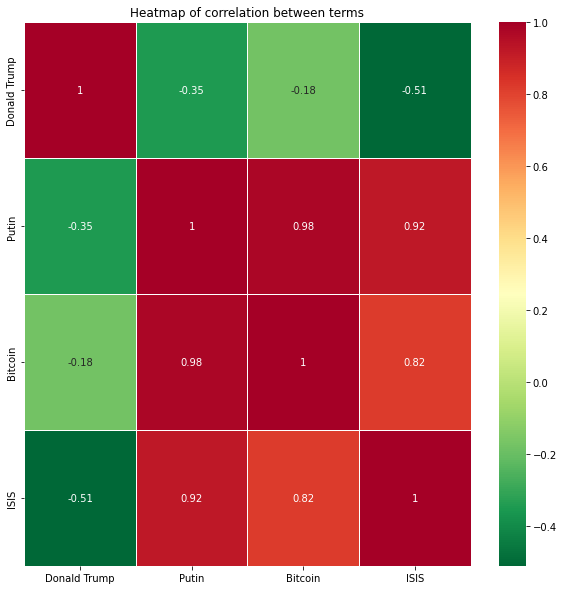

In [126]:
# Heatmap
plt.figure(figsize=(10,10))
plt.title("Heatmap of correlation between terms")
sns.heatmap(first_five_days.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.5)
plt.show()